<a href="https://colab.research.google.com/github/Alina2004A/BMD/blob/main/Levchenko_4_prakt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>4 практична</h1>
<p><font size=10>Левченко БС-11</font></p>




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [ ]:
my_data = []
for i in range(6):
    if i < 3:
        my_data.append(np.random.normal(0,0.1,20))
    else:
        my_data.append(np.random.power(1,20))
for i in my_data:
        print('\n', i, end = '\n')


 [-0.0412023  -0.06722001  0.1498196  -0.09876209 -0.10664415 -0.21003418
 -0.117628   -0.16914663  0.02564399 -0.07546905 -0.25602973  0.03362377
 -0.05423172 -0.16577322  0.02069277  0.12628357 -0.06723439 -0.06358216
 -0.02289758 -0.05365089]

 [ 0.01448914 -0.0612991  -0.12471692  0.03315205  0.10515474 -0.03682549
 -0.13147829 -0.11005587 -0.10078477 -0.07620622 -0.17989289 -0.18096166
  0.00965201  0.15719154  0.04879141 -0.0965567  -0.07215961  0.13098381
 -0.04672701 -0.10759519]

 [-0.06166367 -0.08148049 -0.04834082 -0.13945181  0.16572388  0.08246041
  0.01160262  0.08540327 -0.1758519   0.11588234  0.07152257 -0.08472388
 -0.15285004  0.08652993 -0.0528095  -0.0011945  -0.19661051 -0.01294828
  0.0845392   0.03898022]

 [0.30072298 0.36470282 0.46187214 0.88356637 0.24409282 0.20280771
 0.13666229 0.17833714 0.54087874 0.26535121 0.60025367 0.7525667
 0.36109967 0.49202123 0.51903443 0.69717652 0.34255903 0.45422338
 0.52332496 0.75921168]

 [0.39493165 0.5755307  0.103971

2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [ ]:
#coeficients

In [ ]:
coefs = pd.read_excel("Coeficients for the W test for normality.xlsx")
coefs.head()

,i\n,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
0,1.0,0.7071,0.7071,0.6872,0.6646,0.6431,0.6233,0.6052,0.5888,0.5739,...,0.3940,0.3917,0.3894,0.3872,0.3850,0.3830,0.3808,0.3789,0.3770,0.3751
1,2.0,NaN,NaN,0.1677,0.2413,0.2806,0.3031,0.3164,0.3244,0.3291,...,0.2719,0.2701,0.2684,0.2667,0.2651,0.2635,0.2620,0.2604,0.2589,0.2574
2,3.0,NaN,NaN,NaN,NaN,0.0875,0.1401,0.1743,0.1976,0.2141,...,0.2357,0.2345,0.2334,0.2323,0.2313,0.2302,0.2291,0.2281,0.2271,0.2260
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0561,0.0947,0.1224,...,0.2091,0.2085,0.2078,0.2072,0.2065,0.2058,0.2052,0.2045,0.2038,0.2032
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0399,...,0.1876,0.1874,0.1871,0.1868,0.1865,0.1862,0.1859,0.1855,0.1851,0.1847


In [ ]:
#points

In [ ]:
points = pd.read_excel("Рoints of the distribution of W.xlsx")
points.head()

,n,0-5
0,3.0,0.767
1,4.0,0.748
2,5.0,0.762
3,6.0,0.788
4,7.0,0.803


In [ ]:
def Shapiro(dt):
    dt = sorted(dt)
    n = len(dt)
    
    b, S2, k = 0, 0, 0
    arr = np.zeros(n)
    coef = coefs[n]
    m = n-1
    
    mean = np.mean(dt)
    for i in range(n):
        arr[m] = coef[i]
        S2 += (dt[i] - mean)**2
        m -= 1
        
    if n%2 == 0:
        k = int(n/2)
    else:
        k = int(n/2) - 1
        
    for i in range(k):
        b += arr[m] * (dt[m] - dt[i])
        m -= 1
        
    W = (b**2) / S2
    point = points.loc[points.n == n]
    if W >= (point.iloc[0, 1]):
        return "normal"
    else:
        return "non-normal"

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/open?id=1nT1PwM3cj6VuJa8vkjdsBuNNVoDyGncZ

In [ ]:
my_df = pd.DataFrame(index=np.arange(6), columns=(['Variable','Statistics', 'Distribution']))
my_df

,Variable,Statistics,Distribution
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


4. Занести в стовпчик Variable назви змінних.

In [ ]:
for i in range(6):
    if i < 3:
        my_df.Variable[i] = "Normal"
    else:
         my_df.Variable[i] = "Power"
my_df

,Variable,Statistics,Distribution
0,Normal,NaN,NaN
1,Normal,NaN,NaN
2,Normal,NaN,NaN
3,Power,NaN,NaN
4,Power,NaN,NaN
5,Power,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [ ]:
my_dt = pd.DataFrame(my_data)
m = my_dt.shape[0]
sarr = [0] * m

for i in range(m):
    sarr[i] = Shapiro(my_dt.iloc[:, i])
sarr = np.asarray(sarr)

my_df.Distribution = sarr
my_df

,Variable,Statistics,Distribution
0,Normal,NaN,normal
1,Normal,NaN,normal
2,Normal,NaN,normal
3,Power,NaN,non-normal
4,Power,NaN,normal
5,Power,NaN,normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [ ]:
for i in range(m):
    if sarr[i] == "normal":
        mean = np.round(np.mean(my_dt.iloc[:, i]), 6)
        std = np.round(np.std(my_dt.iloc[:, i]), 6)
        my_df.Statistics[i] = "%.3f [%.3f]" % (mean, std)
my_df

,Variable,Statistics,Distribution
0,Normal,0.151 [0.185],normal
1,Normal,0.186 [0.265],normal
2,Normal,0.189 [0.258],normal
3,Power,NaN,non-normal
4,Power,0.323 [0.329],normal
5,Power,0.120 [0.221],normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [ ]:
for i in range(m):
    if sarr[i] == "non-normal":
        median = np.median(my_dt.iloc[:, i])
        quant1 = np.quantile(my_dt.iloc[:, i],  0.25)
        quant2 = np.quantile(my_dt.iloc[:, i],  0.75)
        my_df.Statistics[i] = "%.3f [%.3f, %.3f]" % (median, quant1, quant2)
my_df

,Variable,Statistics,Distribution
0,Normal,0.151 [0.185],normal
1,Normal,0.186 [0.265],normal
2,Normal,0.189 [0.258],normal
3,Power,"0.043 [-0.066, 0.155]",non-normal
4,Power,0.323 [0.329],normal
5,Power,0.120 [0.221],normal


8. Зберегти таблицю в пдф форматі

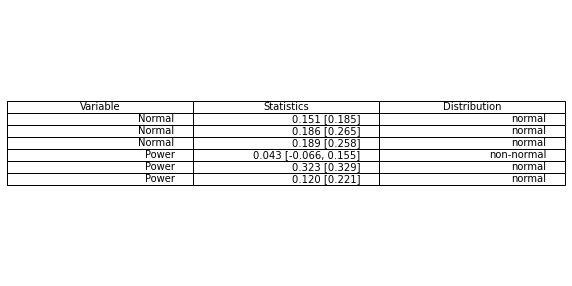

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
text = []
for row in range(len(my_df)):
    text.append(my_df.iloc[row])
ax.table(cellText = text, colLabels = my_df.columns, loc = 'center')
ax.axis('off')
pdf = matplotlib.backends.backend_pdf.PdfPages("lab4_Guivan.pdf")
pdf.savefig(fig)
pdf.close()